In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


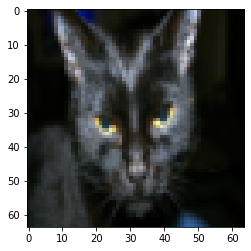

In [4]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [8]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [9]:
#normalize
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [13]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [14]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [109]:
def initialize_with_zeros(dim):
    w = np.zeros((1,dim))
    b= 0
#    print("W's shape:",w.shape)
    return w,b

In [110]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0. 0.]]
b = 0


In [93]:
def propagate(w,b,x,y):
    m = x.shape[1]
    #forward propagation
    z = np.dot(w,x)+b
    a = sigmoid(z)
    #loss
    loss = y*np.log(a)+(1-y)*np.log(1-a)
    #cost
    cost = (-1/m)*(loss.sum(axis=1))
    
    #back propagation
    dz = a-y
    dw = np.dot(dz,x.T)/m
    db = np.sum(dz)/m
    
    grads={"dw":dw,
          "db":db}
    return grads, cost

In [94]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w.T, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601 2.39507239]]
db = 0.001455578136784208
cost = [5.80154532]


In [106]:
 def optimize(w,b,x,y,learning_rate, num_iterations):
        costs=[]
        for i in range(num_iterations):
            grads, cost = propagate(w,b,x,y)
            dw = grads["dw"]
            db = grads["db"]
            #update parameter
            w -= learning_rate*dw
            b -= learning_rate*db
            if i % 10 == 0:
                costs.append(cost)
#                print("cost at",i,":",cost)
            params = {"w": w,
              "b": b}
    
            grads = {"dw": dw,
                     "db": db}
        return params,grads,costs

In [107]:
params, grads, costs = optimize(w.T, b, X, Y, num_iterations= 100, learning_rate = 0.009)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[-0.41315412 -0.49504171]]
b = 2.0505215915329154
dw = [[ 0.06471177 -0.01774377]]
db = -0.05324693276922724


In [82]:
def predict(w,b,x):
    m = x.shape[1]
    y_pred = np.zeros((1,m))
    w = w.reshape(1,x.shape[0])
    a = sigmoid(np.dot(w,x)+b)
    for i in range(m):
        if a[0][i] <= 0.5:
            y_pred[0][i]=0
        else:
            y_pred[0][i]=1
    return y_pred

In [83]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [88]:
def model(x_train,y_train,x_test,y_test,num_iterations,learning_rate):
    w,b = initialize_with_zeros(x_train.shape[0])
    parameters, grads, costs =optimize(w,b,x_train,y_train,learning_rate, num_iterations)
    w = parameters["w"]
    b = parameters["b"]
    y_prediction_test = predict(w,b,x_test)
    y_prediction_train = predict(w,b,x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": y_prediction_test, 
         "Y_prediction_train" : y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations
        }
    
    return d

In [89]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005)

W's shape: (1, 12288)
cost at %d: 0 [0.69314718]
cost at %d: 10 [0.74494036]
cost at %d: 20 [0.71924893]
cost at %d: 30 [0.69733578]
cost at %d: 40 [0.67781423]
cost at %d: 50 [0.65992505]
cost at %d: 60 [0.64324758]
cost at %d: 70 [0.62752067]
cost at %d: 80 [0.61256763]
cost at %d: 90 [0.59826171]
cost at %d: 100 [0.58450836]
cost at %d: 110 [0.5712352]
cost at %d: 120 [0.55838576]
cost at %d: 130 [0.54591536]
cost at %d: 140 [0.53378826]
cost at %d: 150 [0.52197559]
cost at %d: 160 [0.51045393]
cost at %d: 170 [0.49920423]
cost at %d: 180 [0.48821112]
cost at %d: 190 [0.47746243]
cost at %d: 200 [0.46694904]
cost at %d: 210 [0.45666487]
cost at %d: 220 [0.4466072]
cost at %d: 230 [0.43677724]
cost at %d: 240 [0.42718119]
cost at %d: 250 [0.4178317]
cost at %d: 260 [0.40875011]
cost at %d: 270 [0.39996939]
cost at %d: 280 [0.39153768]
cost at %d: 290 [0.38352161]
cost at %d: 300 [0.37600687]
cost at %d: 310 [0.36909172]
cost at %d: 320 [0.36286718]
cost at %d: 330 [0.35738242]
cost a

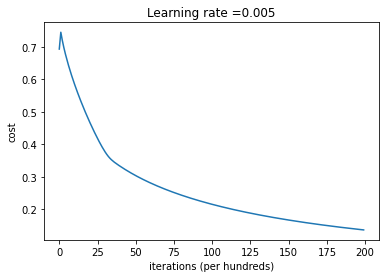

In [103]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



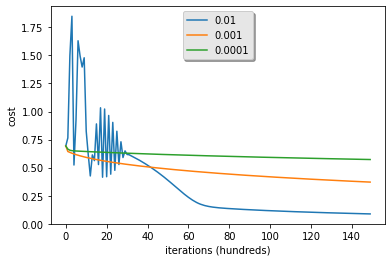

In [111]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()